# Problem 2
## 问题描述
对附件Data2.xls中的数据，建立颜色读数和物质浓度的数学模型，并给出模型的误差分析。

In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from scipy.optimize import curve_fit

In [2]:
data2 = pd.read_excel('Data2.xls')
data2

,substance,ppm,R,G,B,S,H
0,SO_2,0,153,148,157,138,14
1,SO_2,0,153,147,157,138,16
2,SO_2,0,153,146,158,137,20
3,SO_2,0,153,146,158,137,20
4,SO_2,0,154,145,157,141,19
5,SO_2,20,144,115,170,135,82
6,SO_2,20,144,115,169,136,81
7,SO_2,20,145,115,172,135,83
8,SO_2,30,145,114,174,135,87
9,SO_2,30,145,114,176,135,89


## 思路一：函数模型拟合
使用scipy.optimize.curve_fit

[array([1.40686427e+01, 3.29488773e-02, 1.38910437e+02]),
 array([5.65247131e+01, 3.13425489e-02, 8.92339517e+01]),
 array([ -18.4       , 1126.66061306,  175.8       ]),
 array([  2.4,   1. , 135.8]),
 array([-1.06189205e+02,  3.88749250e-02,  1.24730556e+02])]

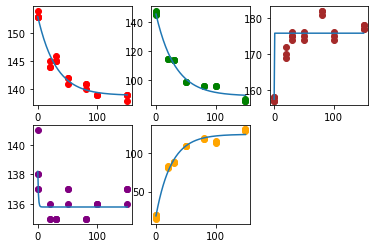

In [15]:
poptlist = []
def curve_model(x,a,b,c):
    return a*np.exp(-b*x)+c
for i,(color_index,color) in enumerate(zip('RGBSH',('r','g','brown','purple','orange'))):
    plt.subplot(int(f'23{i+1}'))
    plt.scatter(data2['ppm'],data2[color_index],c=color)
    popt,pcov = curve_fit(curve_model,data2['ppm'],data2[color_index])
    x = np.linspace(0,150,150)
    plt.plot(x,curve_model(x,*popt))
    poptlist.append(popt)
    # plt.title(f'SO_2-{color_index}')
poptlist

## 思路二：使用神经网路

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [5]:
x_data_0 = data2[list('RGBSH')]
x_data_scaler = StandardScaler().fit(x_data_0)
x_data_1 = x_data_scaler.transform(x_data_0)

In [6]:
y_data_0 = np.array(data2['ppm']).reshape(-1,1)
y_data_scaler = StandardScaler().fit(y_data_0)
y_data_1 = y_data_scaler.transform(y_data_0)

In [19]:
rfr = RandomForestRegressor()
rfr.fit(x_data_0,y_data_0)
rfr.score(x_data_0,y_data_0)
rfr.predict(x_data_0)

array([  0. ,   0. ,   0.2,   0.2,   0. ,  20.6,  20.8,  21.3,  30.4,
        30.6,  30.6,  30.6,  51.8,  58.8,  49.6,  78.1,  78.1,  85. ,
        99.3,  99.3,  99.8, 141.7, 148.8, 148.8, 148.8])

In [7]:
regressor = MLPRegressor([8,20,20,8],max_iter=1000) 
regressor.fit(x_data_1,y_data_1)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[8, 20, 20, 8], learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=1000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [9]:
regressor.score(x_data_1,y_data_1)

0.9899165185673198

In [8]:
y_predict_1 = regressor.predict(x_data_1)
y_predict_0 = y_data_scaler.inverse_transform(y_predict_1)
y_predict_0,y_data_0

(array([ -1.61122867,  -1.15912341,   1.50048224,   1.50048224,
         -5.89333183,  30.82581265,  30.11901702,  31.22141043,
         32.36189999,  34.80536742,  33.92509217,  32.27217019,
         49.43310936,  56.18682714,  53.23118094,  76.41982719,
         74.05443539,  84.71265051, 102.28343243, 101.31628611,
        102.16104416, 147.13380859, 144.01722039, 155.55732119,
        146.50410784]),
 array([[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [ 20],
        [ 20],
        [ 20],
        [ 30],
        [ 30],
        [ 30],
        [ 30],
        [ 50],
        [ 50],
        [ 50],
        [ 80],
        [ 80],
        [ 80],
        [100],
        [100],
        [100],
        [150],
        [150],
        [150],
        [150]], dtype=int64))